In [1]:
#importing the required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading the train data

In [3]:

dt=pd.read_csv('Evaluation Project - 8 Flight Price Prediction train data')
dt

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# loading the test data

In [4]:
td=pd.read_csv('Evaluation Project - 8Flight Price Prediction test data')
td

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


# train data

In [5]:
dt

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
#columns
dt.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
#data info
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
 #checking the null values
dt.isnull().sum()    

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#from above we can clearly see that there is null values present in 'Route','Total_Stops' columns so lets handel this

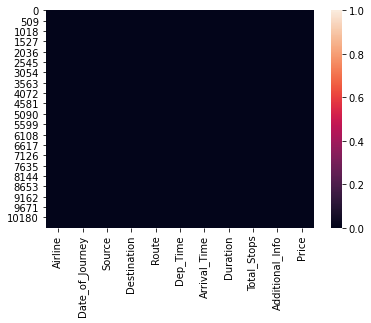

In [9]:
#plotting the heatmap
sns.heatmap(dt.isnull())

In [10]:
dt['Route'].fillna('unkown',inplace=True)
dt['Route'].isnull().sum()

0

In [11]:
dt['Total_Stops'].fillna('blank',inplace=True)
dt['Total_Stops'].isnull().sum()

0

In [12]:
dt.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

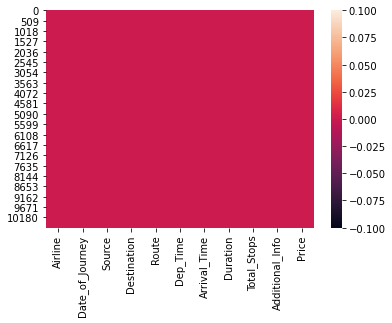

In [13]:
sns.heatmap(dt.isnull())

#we can clearly see all the null values are removed from our train data

In [14]:
#data Visualization
for i in dt.columns:
    print(dt[i].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156


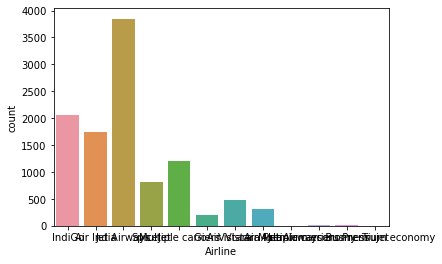

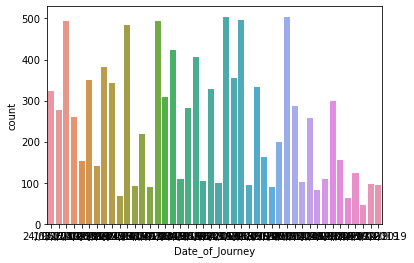

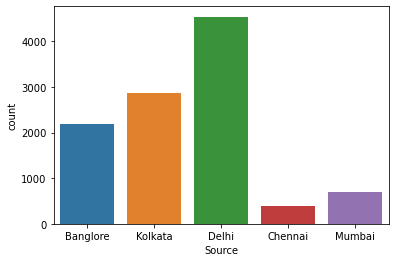

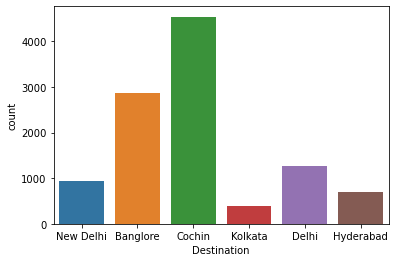

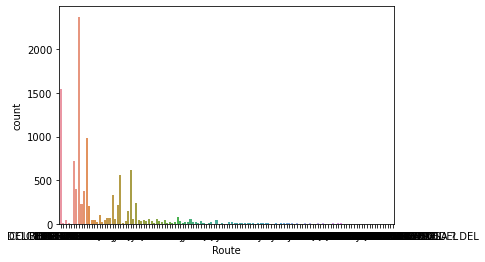

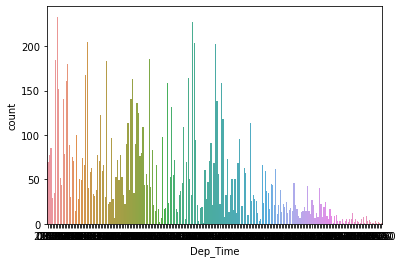

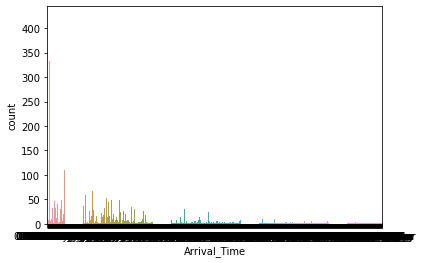

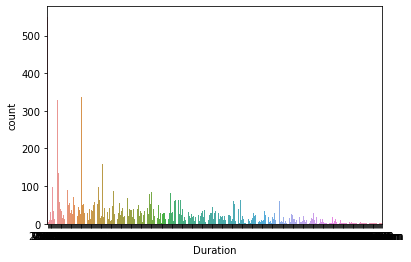

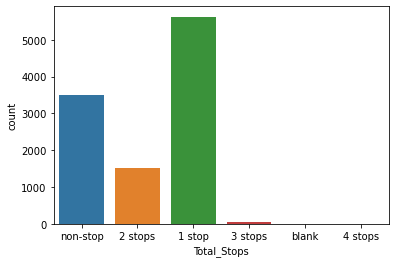

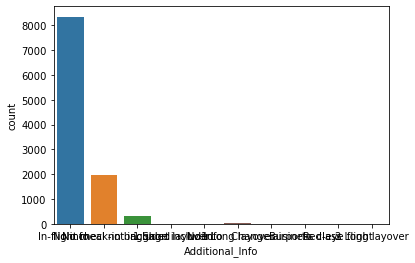

In [15]:
ob=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']
for i in ob:
    plt.show()
    sns.countplot(i,data=dt)

<bound method IndexOpsMixin.value_counts of 0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64>


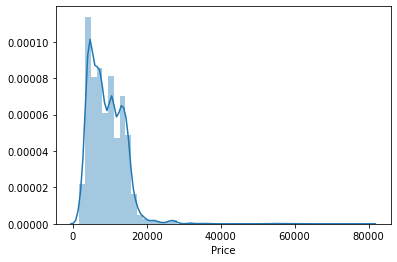

In [16]:
sns.distplot(dt[ 'Price'])
print(dt[ 'Price'].value_counts)

In [17]:
#encoding of the all object type data into numeric form
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder()

In [18]:
for i in td.columns:
    if dt[i].dtypes=='object':
        dt[i]=oe.fit_transform(dt[i].values.reshape(-1,1))
    
dt

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,5.0,8.0,3897
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0,7662
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0,13882
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0,6218
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,41.0,3.0,0.0,64.0,183.0,1259.0,236.0,5.0,8.0,4107
10679,1.0,29.0,3.0,0.0,64.0,193.0,1305.0,237.0,5.0,8.0,4145
10680,4.0,29.0,0.0,2.0,18.0,58.0,824.0,280.0,5.0,8.0,7229
10681,10.0,0.0,0.0,5.0,18.0,92.0,938.0,238.0,5.0,8.0,12648


In [19]:
#checking correlation
dt.corr()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.022251,-0.013401,0.018479,0.025039,-0.039439,-0.015733,0.027917,0.046130,-0.060802,-0.039520
Date_of_Journey,0.022251,1.000000,0.167549,-0.273357,0.275233,-0.007836,-0.012507,-0.001168,-0.045486,0.008382,-0.036942
Source,-0.013401,0.167549,1.000000,-0.592574,0.403378,0.055191,0.020844,-0.192009,-0.227074,-0.022107,0.015998
Destination,0.018479,-0.273357,-0.592574,1.000000,-0.461169,-0.063608,-0.036830,0.022037,0.340446,0.026806,-0.071112
Route,0.025039,0.275233,0.403378,-0.461169,1.000000,-0.082080,0.010523,-0.062111,-0.445250,0.035216,0.164085
Dep_Time,-0.039439,-0.007836,0.055191,-0.063608,-0.082080,1.000000,-0.023294,0.041619,0.046574,-0.052853,0.002949
Arrival_Time,-0.015733,-0.012507,0.020844,-0.036830,0.010523,-0.023294,1.000000,0.027746,-0.095612,0.017505,0.027377
Duration,0.027917,-0.001168,-0.192009,0.022037,-0.062111,0.041619,0.027746,1.000000,0.177752,0.080151,-0.144270
Total_Stops,0.046130,-0.045486,-0.227074,0.340446,-0.445250,0.046574,-0.095612,0.177752,1.000000,0.161728,-0.581863
Additional_Info,-0.060802,0.008382,-0.022107,0.026806,0.035216,-0.052853,0.017505,0.080151,0.161728,1.000000,-0.065478


plt.figure(figsize=(10,15))
sns.heatmap(dt,annot=True)

In [20]:
#correlation matrix whith respect to target variable
corr_matrix=dt.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price              1.000000
Route              0.164085
Arrival_Time       0.027377
Source             0.015998
Dep_Time           0.002949
Date_of_Journey   -0.036942
Airline           -0.039520
Additional_Info   -0.065478
Destination       -0.071112
Duration          -0.144270
Total_Stops       -0.581863
Name: Price, dtype: float64

In [21]:
#checking the statical summary
dt.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,74.825143,107.980717,869.828419,194.069269,1.785266,7.393054,9087.064121
std,2.352155,12.337763,1.177221,1.474782,36.730924,61.085563,331.509504,108.620556,2.268105,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,5.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,128.000000,221.000000,1342.000000,367.000000,5.000000,9.000000,79512.000000


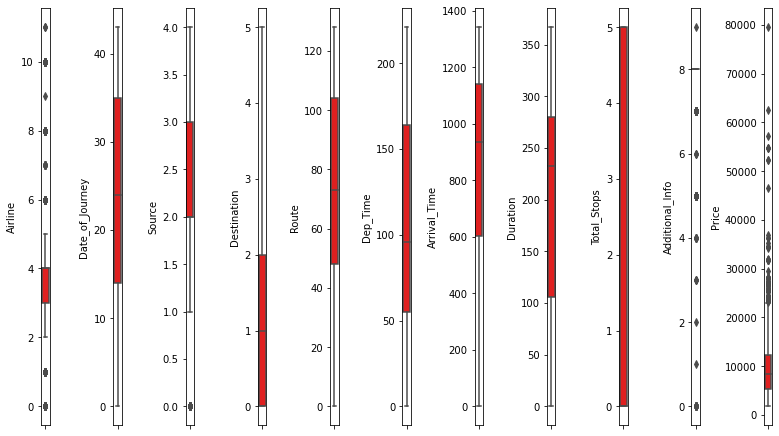

In [22]:
#checking outlairs
collist=dt.columns
ncol=30
nrow=15
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(dt[collist[i]],color='Red',orient='v')
    plt.tight_layout()


In [23]:
#splitting the feature and target data
x=dt.drop('Price',axis=1)
x.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,5.0,8.0
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0


In [24]:
y=dt['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [25]:
x.shape

(10683, 10)

In [26]:
y=y.values.reshape(-1,1)

In [27]:
y.shape

(10683, 1)

In [28]:
#handling the skewness
x.skew()

Airline            0.731095
Date_of_Journey   -0.070888
Source            -0.424054
Destination        1.244169
Route             -0.501909
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Total_Stops        0.668085
Additional_Info   -1.779838
dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [30]:
#selecting the best random state
MaxR2=0
maxRs=0
for i in range (0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=i)
    Lr=LinearRegression()
    Lr.fit(x_train,y_train)
    pred=Lr.predict(x_test)
    r2score=r2_score(y_test,pred)
    if r2score>MaxR2:
        MaxR2=r2score
        maxRs=i
        
print('best r2score is',MaxR2,'at random_stae', maxRs)

best r2score is 0.502652318752336 at random_stae 87


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=87)

In [32]:
print(mean_squared_error(y_test,pred))

27310499.165326495


In [33]:
print(mean_absolute_error(y_test,pred))

4255.004772089791


In [34]:
#crossvalidation
from sklearn.model_selection import cross_val_score
cvr=cross_val_score(Lr,x,y,cv=5)
print ('crossvalidation of the LinearRegression is',cvr.mean())

crossvalidation of the LinearRegression is 0.367099227927985


In [35]:
#ensemble method
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parametrs={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parametrs)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [39]:
rf=RandomForestRegressor(criterion= 'mse',max_features= 'auto' )
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rfs=r2_score(y_test,pred)
print('r2_score',rfs*100)


r2_score 88.66323331197034


In [40]:
#cross validation
cvr=cross_val_score(rf,x,y,cv=5)
print ('crossvalidation of the RandomforestRegression is',cvr.mean())

crossvalidation of the RandomforestRegression is 0.864517282243502


#from we can clearly see the diff between  r2 score and cv socre is 2 in compare to linearregression so our model is performing good in case of randforestregression

In [59]:
import joblib
joblib.dump(rf,'Flight Price Prediction')

['Flight Price Prediction']

# loading the test data

In [45]:

td

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [46]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [48]:
td.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

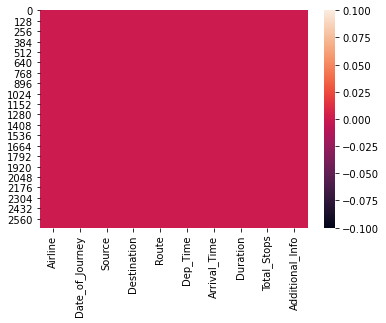

In [49]:
sns.heatmap(td.isnull())

In [50]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder()

In [52]:
for i in td.columns:
    if td[i].dtypes=='object':
        td[i]=oe.fit_transform(td[i].values.reshape(-1,1))
    
td

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4.0,39.0,2.0,1.0,76.0,138.0,150.0,10.0,0.0,5.0
1,3.0,10.0,3.0,0.0,65.0,31.0,353.0,248.0,0.0,5.0
2,4.0,22.0,2.0,1.0,76.0,156.0,566.0,148.0,0.0,3.0
3,6.0,22.0,2.0,1.0,76.0,48.0,633.0,36.0,0.0,5.0
4,0.0,27.0,0.0,2.0,16.0,198.0,135.0,216.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...
2666,1.0,39.0,3.0,0.0,51.0,170.0,617.0,150.0,0.0,5.0
2667,3.0,28.0,3.0,0.0,43.0,106.0,507.0,213.0,4.0,5.0
2668,4.0,36.0,2.0,1.0,76.0,183.0,151.0,278.0,0.0,5.0
2669,1.0,36.0,2.0,1.0,76.0,11.0,577.0,60.0,0.0,5.0


# load the model

In [60]:
model=joblib.load('Flight Price Prediction')

In [61]:
model.predict(td)

array([ 7920.91  ,  6020.29  ,  9038.0275, ...,  8291.82  , 11549.27  ,
        9196.1775])